In [3]:
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
import xgboost
from imblearn.over_sampling import RandomOverSampler

In [7]:
inputpath = "D:\\DataScience\\CyberSecurity\\Input\\"
traindata = pd.read_csv(inputpath + "GUIDE_Train.csv")

In [9]:


#inputpath = "D:\\DataScience\\CyberSecurity\\Input\\"
#traindata = pd.read_csv(inputpath + "GUIDE_Train.csv")

#checking null values
traindata.isnull().sum()

# cehcking null percentage
perc = traindata.isnull().mean()* 100
pd.DataFrame({
    'column_name': perc.index,
    "null_perc": perc.values,
    "null_count": traindata.isnull().sum().values
})

# droping 9 columns which have 90% of misisng values
drop_col = ["ActionGrouped", "ActionGranular", "EmailClusterId", "ThreatFamily", "ResourceType", "Roles", "AntispamDirection",
            "SuspicionLevel", "LastVerdict"]
traindata.drop(drop_col, axis=1, inplace= True)

# 50% of the data is missing for MitreTechniques columns so performing mode imputationx

mode_gen = traindata['MitreTechniques'].mode()[0]
traindata['MitreTechniques'].fillna(mode_gen, inplace= True)

# 5% of the data is missing for IncidentGrade column so so performing mode imputation
incmode_gen = traindata['IncidentGrade'].mode()[0]
traindata['IncidentGrade'].fillna(incmode_gen, inplace= True)




C:\Users\Hedavguhan\AppData\Local\Temp\ipykernel_19236\1057229987.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traindata['MitreTechniques'].fillna(mode_gen, inplace= True)
C:\Users\Hedavguhan\AppData\Local\Temp\ipykernel_19236\1057229987.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [11]:
# Change Date format for Open Date column in StoresData
traindata['Timestamp'] = pd.to_datetime(traindata['Timestamp'])
traindata['Timestamp'] = traindata['Timestamp'].dt.strftime('%Y/%m/%d %H:%M:%S')
traindata['Timestamp']= pd.to_datetime( traindata['Timestamp'])
traindata['hour'] = traindata['Timestamp'].dt.hour
traindata['day_of_week'] = traindata['Timestamp'].dt.day_name()
traindata['Timestamp'] = traindata['Timestamp'].dt.strftime('%Y/%m/%d')

In [13]:
traindata['Timestamp'].dtype

dtype('O')

In [15]:
traindata['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    4162157
TruePositive      3322713
FalsePositive     2031967
Name: count, dtype: int64

In [13]:
traindata.head()

Id  OrgId  IncidentId  AlertId   Timestamp  DetectorId  \
0   180388628218      0         612   123247  2024/06/04           7   
1   455266534868     88         326   210035  2024/06/14          58   
2  1056561957389    809       58352   712507  2024/06/13         423   
3  1279900258736     92       32992   774301  2024/06/10           2   
4   214748368522    148        4359   188041  2024/06/15           9   

   AlertTitle           Category  MitreTechniques   IncidentGrade  ...  \
0           6      InitialAccess  T1078;T1078.004    TruePositive  ...   
1          43       Exfiltration  T1078;T1078.004   FalsePositive  ...   
2         298      InitialAccess            T1189   FalsePositive  ...   
3           2  CommandAndControl  T1078;T1078.004  BenignPositive  ...   
4          74          Execution  T1078;T1078.004    TruePositive  ...   

  FileName FolderPath  ResourceIdName  OSFamily  OSVersion  CountryCode  \
0   289573     117668            3586         5         66           31   
1   289573     117668            3586         5         66          242   
2   289573     117668            3586         5         66          242   
3   289573     117668            3586         5         66          242   
4   289573     117668            3586         5         66          242   

   State   City  hour  day_of_week  
0      6      3     6      Tuesday  
1   1445  10630     3       Friday  
2   1445  10630     4     Thursday  
3   1445  10630    16       Monday  
4   1445  10630     1     Saturday  

[5 rows x 38 columns]

In [15]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 38 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   Timestamp           object
 5   DetectorId          int64 
 6   AlertTitle          int64 
 7   Category            object
 8   MitreTechniques     object
 9   IncidentGrade       object
 10  EntityType          object
 11  EvidenceRole        object
 12  DeviceId            int64 
 13  Sha256              int64 
 14  IpAddress           int64 
 15  Url                 int64 
 16  AccountSid          int64 
 17  AccountUpn          int64 
 18  AccountObjectId     int64 
 19  AccountName         int64 
 20  DeviceName          int64 
 21  NetworkMessageId    int64 
 22  RegistryKey         int64 
 23  RegistryValueName   int64 
 24  RegistryValueData   int64 
 25  ApplicationId     

In [17]:
le = LabelEncoder() 
# Bulk Transform
for i in traindata.select_dtypes(include='object').columns:
    traindata[i] = le.fit_transform(traindata[i])  

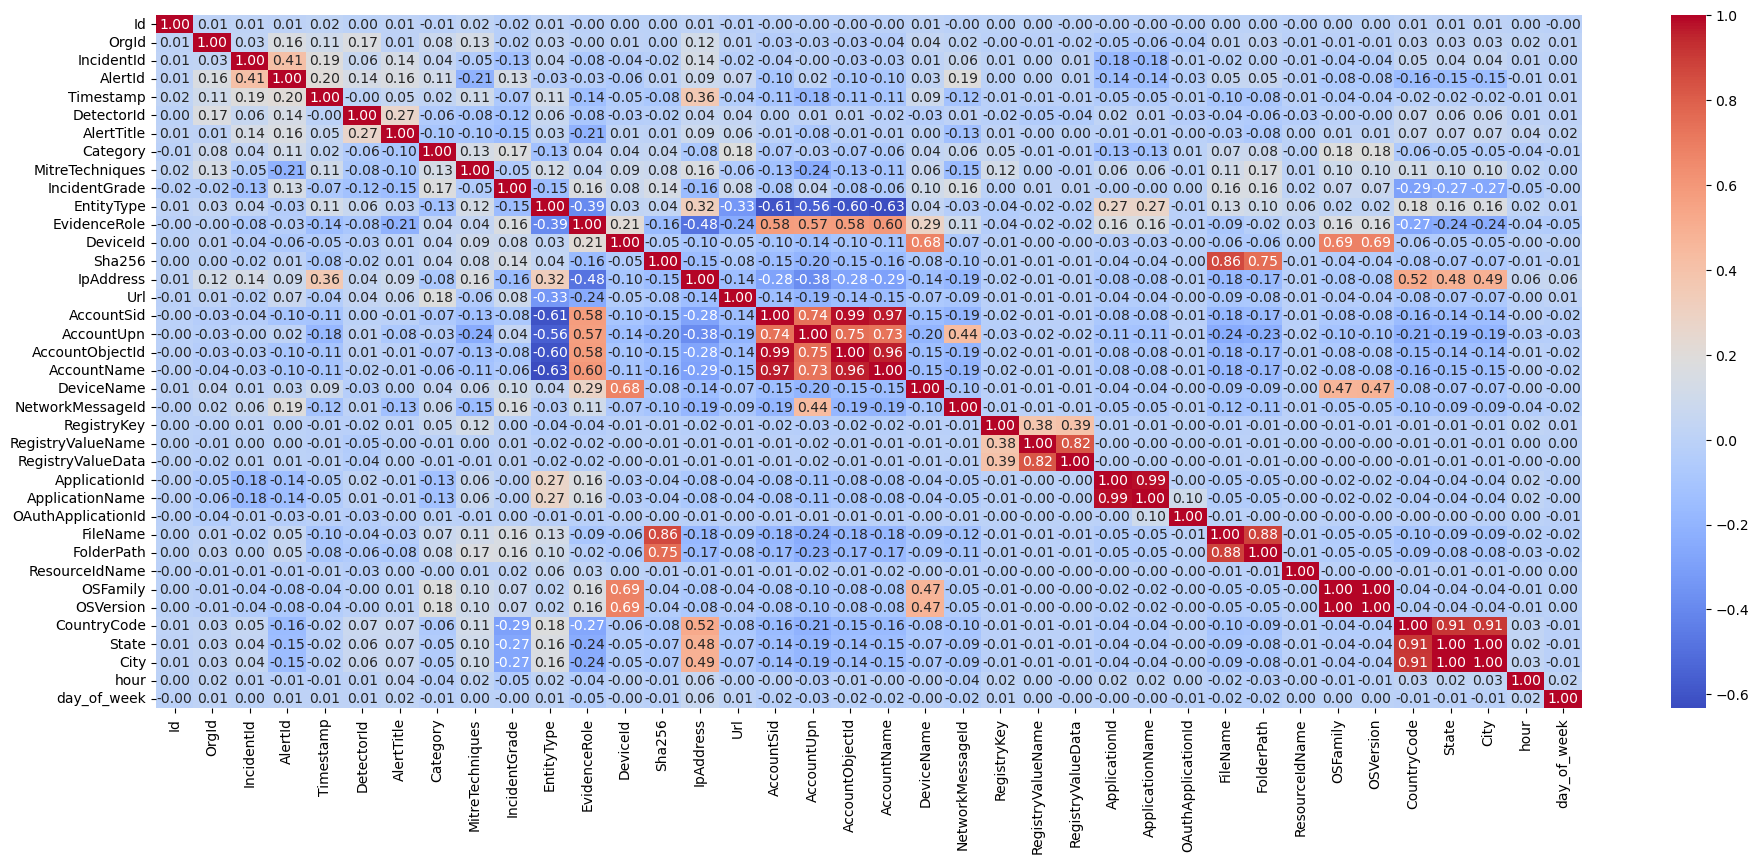

In [19]:
data_corr = traindata.corr()       # Correlation Coff metric


# Ploting Corr Heatmap
plt.figure(figsize = (23, 9))
sns.heatmap(data_corr, cmap='coolwarm', fmt='.2f', annot= True)
plt.show()

In [ ]:
#'RegistryValueName',  'ApplicationName', 'FileName', 'OSFamily', 'State', 'AccountSid' are highly correlating with 'RegistryValueData', 'ApplicationId', 'FileName', 'OSVersion','CountryCode', 'City' and 'AccountUpn', respectively, so droping features 'RegistryValueName',  'ApplicationName', 'FileName', 'OSFamily', 'State', 'AccountSid'

In [19]:
traindata.drop(['RegistryValueName',  'ApplicationName', 'FileName', 'OSFamily', 'State', 'AccountSid'], axis=1, inplace= True)

In [21]:
traindata.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'EntityType', 'EvidenceRole', 'DeviceId', 'Sha256', 'IpAddress', 'Url',
       'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'RegistryKey', 'RegistryValueData', 'ApplicationId',
       'OAuthApplicationId', 'FolderPath', 'ResourceIdName', 'OSVersion',
       'CountryCode', 'City', 'hour', 'day_of_week'],
      dtype='object')

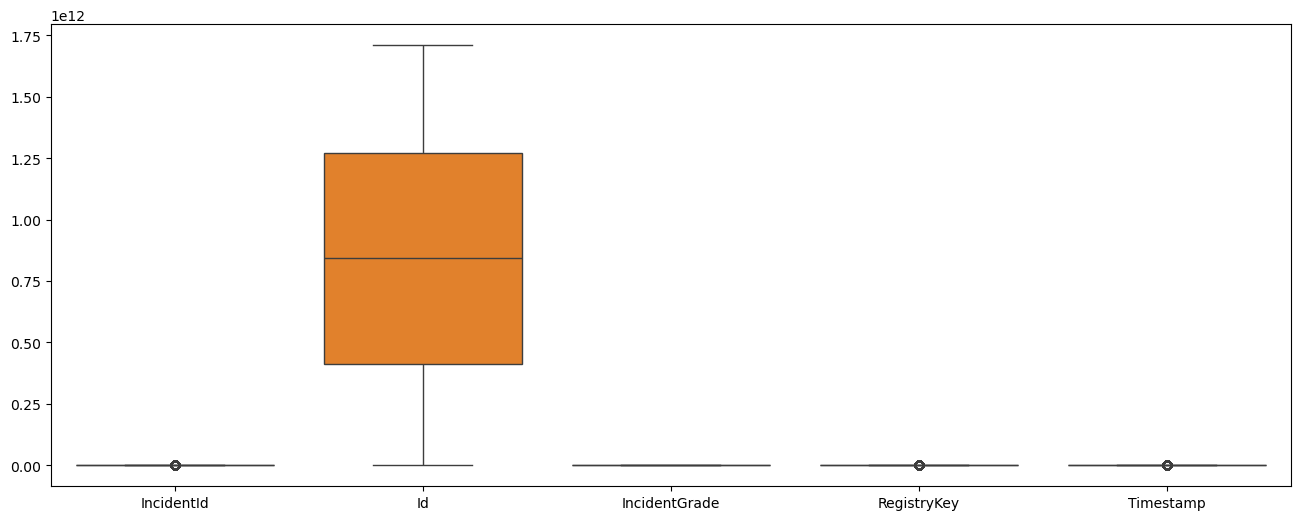

In [23]:
# Outliers
plt.figure(figsize=(16,6))
sns.boxplot(data = traindata[['IncidentId', 'Id', "IncidentGrade", "RegistryKey", "Timestamp"]])
plt.show()

In [26]:
# Splitting data as training and testing 
val= traindata.drop('IncidentGrade', axis = 1)
tar = traindata['IncidentGrade']

In [28]:
train_data, test_data, train_lab, test_lab = train_test_split(val, tar, test_size= 0.30, random_state= 43)

In [31]:
train_data.shape

(6661785, 31)

In [33]:
test_data.shape

(2855052, 31)

In [35]:
tar.value_counts()

IncidentGrade
0    4162157
2    3322713
1    2031967
Name: count, dtype: int64

In [30]:
# Performance Supporting Function

def get_perform(actual, pred):
    acc = accuracy_score(actual, pred) * 100
    prec = precision_score(actual, pred, pos_label='none',
                           average='micro') * 100
    rec = recall_score (actual, pred, pos_label='none',
                           average='micro') * 100
    f1 = f1_score(actual, pred, pos_label='none',
                           average='micro') * 100
    return pd.DataFrame({
        "accuracy": [acc],
        "precision": [prec],
        "recall": [rec],
        "F1 score" : [f1]
    })



In [ ]:
# decision tree model to establish a performance benchmark
dt_model = DecisionTreeClassifier(max_depth= 10,criterion='entropy',random_state= 56)
dt_model.fit(train_data, train_lab)

In [43]:
dttr_pred = dt_model.predict(train_data)
dtts_pred = dt_model.predict(test_data)

In [45]:
# Train Performance
get_perform(train_lab, dttr_pred)

C:\Users\Hedavguhan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'none') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Hedavguhan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'none') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Hedavguhan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'none') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy  precision    recall  F1 score
0  67.09439   67.09439  67.09439  67.09439

In [47]:
# Test Perfromance 

get_perform(test_lab, dtts_pred)

C:\Users\Hedavguhan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'none') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Hedavguhan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'none') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Hedavguhan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'none') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy  precision     recall   F1 score
0  67.096816  67.096816  67.096816  67.096816

In [49]:
# Output
test_data.head(1)

dt_model.predict(test_data.head(1))

array([0])

In [51]:
# Feature used as importance

pd.DataFrame({
    "columns": test_data.columns,
    "score": dt_model.feature_importances_
}).sort_values('score', ascending = False).head()['columns'].to_list()

['OrgId', 'IncidentId', 'AlertTitle', 'DetectorId', 'AlertId']

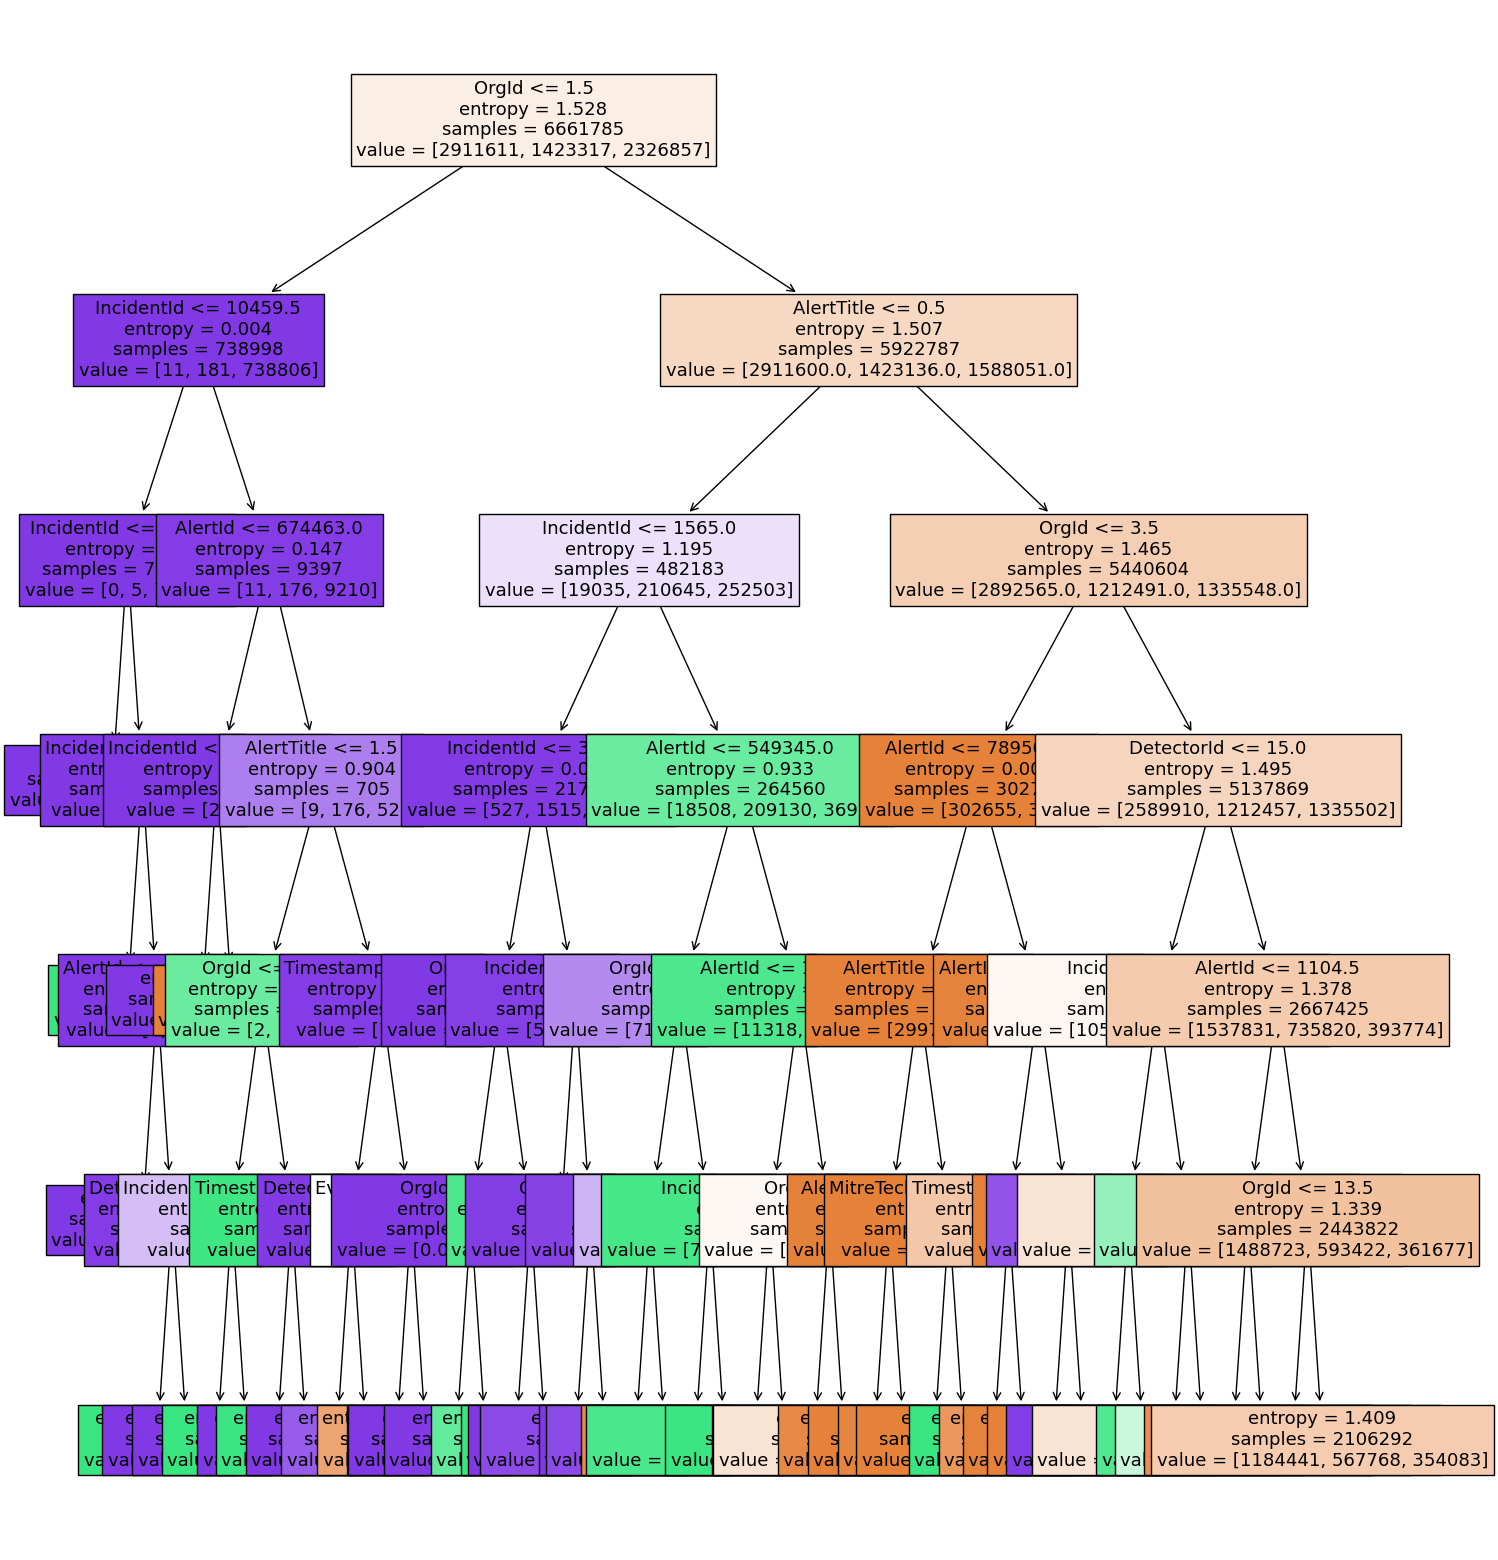

In [53]:
# ploting Tree

plt.figure(figsize=(16, 20))   # adjust height instead of 7 => 50
plot_tree(dt_model, filled= True, feature_names= test_data.columns, fontsize= 13)
plt.savefig("D-Tree.png", dpi = 360)
plt.show()

In [ ]:
rf_model = RandomForestClassifier(n_estimators= 100, random_state= 63, criterion='entropy', max_depth= 5)
rf_model.fit(train_data, train_lab)

In [ ]:
tr_pred = rf_model.predict(train_data)
ts_pred = rf_model.predict(test_data)

In [ ]:
get_perform(train_lab, tr_pred)

In [ ]:
get_perform(test_lab, ts_pred)

In [ ]:
os = RandomOverSampler(random_state= 45)
oval, otar = os.fit_resample(val, tar)

In [ ]:
fs = RandomForestClassifier(n_estimators= 300,random_state= 56)
fs.fit(oval, otar)

In [ ]:
pd.DataFrame({
    "Columns": oval.columns,
    "Score": fs.feature_importances_
}).sort_values('Score', ascending= False).head(7)["Columns"].to_list()

In [ ]:
traindata, testdata, trainlab, testlab = train_test_split(val, tar, test_size= 0.20, random_state= 43)

In [ ]:
model = GradientBoostingClassifier(n_estimators= 350, learning_rate= 0.9, random_state= 55)
model.fit(traindata, trainlab)

In [34]:
model = GradientBoostingClassifier(n_estimators= 350, learning_rate= 0.9, random_state= 55)
model.fit(train_data, train_lab)

MemoryError: Unable to allocate 48.0 MiB for an array with shape (6291060,) and data type float64

In [ ]:
model = xgboost.XGBClassifier(n_estimators= 100, learning_rate= 0.6, random_state= 55)
model.fit(train_data, train_lab)